In [1]:
import numpy as np
import pandas as pd #for loading csv Excel files
import itertools #to merge lists
from scipy.interpolate import interp1d
from scipy.optimize import leastsq, curve_fit #for fitting
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams
from scipy.special import kn #Modified Bessel function of the second kind of integer order n
import scipy.integrate as integrate #for (numerical) integrating

# Options for plotting

In [2]:
fontsize=26
legendfontsize=22
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
rc('font', family='serif', serif='Computer Modern Roman')

In [3]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255'
purple='#5D3A9B'
magenta='#AA4499'
red='#DC3220'
orange='#E66100'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,red,orange,yellow,green]

# Constants

In [381]:
hbar=1.
c=2.99792458*10.**8.*10.**(-3.) #km/s (not m/s)

# Approximate analytical solution for deltal

In [397]:
def deltalappr(potential,alphaX,mX,mphi,l,v):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    m=(mX/2.)  #reduced mass m
    k=m*(v/c) #momentum k
    r0=l/k
    deltalappr=(-1.)*prefactor*alphaX*(m/hbar**2)*(kn(0.,mphi*r0)/k)
    return deltalappr

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1
v=10 #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))

-411.64339210020086


# Numerical solution for deltal

In [105]:
#_____Yukawa potential_____
def U(potential,alphaX,mphi,r):
    if potential=='attractive':
        prefactor=+1.
    elif potential=='repulsive':
        prefactor=-1.
    U=prefactor*(alphaX/r)*np.exp(-mphi*r)
    return U

In [552]:
def deltal(potential,alphaX,mX,mphi,l,v):
    #_____Relations_____
    m=(mX/2.)  #reduced mass m
    k=m*(v/c) #momentum k
    E=(hbar**2.*k**2.)/(2.*m) #kinetic energy
    #_____deltal integral_____
    #def integrand(r):
    #    return -(mX/hbar**2)*(U(potential,alphaX,mphi,r)/np.sqrt(k**2.-((l+1./2.)**2./r**2.)))
    #def integrand(r):
    #    return (1./hbar)*np.sqrt(hbar**2.*k**2.-2.*m*U(potential,alphaX,mphi,r)-(hbar**2.*(l+1./2.)**2.)/r**2.)-k ###Doesn't work well. Numerically very unstable.
    def integrand(r):
        x=1.-(r0**2./r**2)
        #x=k**2.-((l+1./2.)**2./r**2.)
        y=U(potential,alphaX,mphi,r)/(E*c**2)
        #y=2*m*U(potential,alphaX,mphi,r)
        #print([x,y])
        #print([np.sqrt(x-y),np.sqrt(x)])
        #return np.sqrt(x-y)-np.sqrt(x)
        #print([np.sqrt(1-y/x),1.])
        return np.sqrt(x)*(np.sqrt(1-y/x)-1.)
    r0=l/k
    #rmax=10**6 #.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    rmax=10**2.*r0 #Value cannot be smaller than this for l=1. Otherwise r0>rmax.
    logging=False
    if logging:
        print([r0,rmax,rmax/r0])
        pl.xscale('log')
        #pl.yscale('log') 
        Rvals=np.logspace(np.log10(r0),np.log10(rmax),50)
        pl.plot(Rvals,[integrand(r) for r in Rvals])
        pl.show()
        pl.xscale('log')
        #pl.yscale('log')
        pl.plot(Rvals,[U(potential,alphaX,mphi,r) for r in Rvals])
        pl.show()
    #deltal=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    #deltalintegral=integrate.quad(integrand,r0,rmax,limit=500,points=r0)[0] #,limit=200
    #deltal=deltalintegral+(1./2.)*np.pi*(l+(1./2.))-k*r0
    #print([deltalintegral,(1./2.)*np.pi*(l+(1./2.))-k*r0])
    deltalintegral=integrate.quad(integrand,r0,rmax,limit=200)[0] #,limit=200
    deltal=k*c**2*deltalintegral
    return deltal

potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
l=1.
v=10. #km/s
print(deltalappr(potential,alphaX,mX,mphi,l,v))
print(deltal(potential,alphaX,mX,mphi,l,v))

-411.64339210020086
-411.6428220507938


In [553]:
#vvals=np.logspace(np.log10(1.),np.log10(10.**4.),100)
vvals=np.logspace(np.log10(10.),np.log10(10.**4.),100)

l=1

[v,deltaappr,delta]:
[10.0, -411.64339210020086, -411.6428220507938]
[10.722672220103231, -401.8682712231668, -401.86766163704556]
[11.497569953977356, -391.68367962643094, -391.68470042856717]
[12.32846739442066, -381.16748156285183, -381.1667585734447]
[13.219411484660288, -370.39205597480753, -370.3921999966576]
[14.174741629268055, -359.42425877607076, -359.4249880510128]
[15.199110829529339, -348.32546494226574, -348.3258319922835]
[16.297508346206442, -337.15167553574, -337.1510563769013]
[17.47528400007684, -325.9536764220156, -325.95334994241875]
[18.73817422860384, -314.7772370349801, -314.77716558595137]
[20.09233002565047, -303.6633390768678, -303.6645456386431]
[21.544346900318846, -292.64842647004787, -292.64765382053645]
[23.101297000831604, -281.7646691942453, -281.76480118460404]
[24.770763559917114, -271.0402348366415, -271.0408248719867]
[26.560877829466868, -260.49956275105444, -260.4997436785138]
[28.48035868435802, -250.16363666820536, -250.162922197371]
[30.5

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.



[v,deltaappr,delta]:
[10.0, -10.439657650303863, -10.438566529128154]
[10.722672220103231, -12.310620317002686, -12.30356723488896]
[11.497569953977356, -14.318685696165817, -14.32385715644918]
[12.32846739442066, -16.441903154507557, -16.43923189172008]
[13.219411484660288, -18.65503211980979, -18.666266332827295]
[14.174741629268055, -20.930475602666178, -20.93756366147032]
[15.199110829529339, -23.239253952813485, -23.250071918550784]
[16.297508346206442, -25.551962375691243, -25.553196283876893]
[17.47528400007684, -27.839664834966978, -27.836567038706143]
[18.73817422860384, -30.07468797736889, -30.075808446969603]
[20.09233002565047, -32.23129030563422, -32.23240193923684]
[21.544346900318846, -34.286192924388835, -34.28512614901359]
[23.101297000831604, -36.21896802835528, -36.22319061347037]
[24.770763559917114, -38.01228942892328, -38.00974199683329]
[26.560877829466868, -39.65205562361832, -39.649292335003466]
[28.48035868435802, -41.127400212174706, -41.139055107676505]
[30

Plots/deltal.pdf exported.


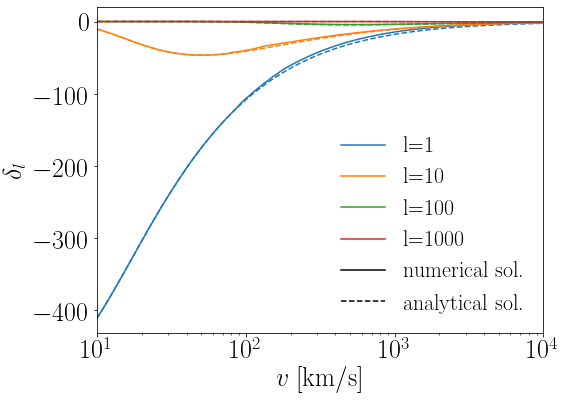

In [554]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
lvals=[1,10,100,1000]
#lvals=[1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    print('l='+str(l))
    color='C'+str(i)
    deltalvals=np.array([deltal(potential,alphaX,mX,mphi,l,v) for v in vvals])
    print()
    deltalapprvals=np.array([deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals])
    logging=True
    if logging==True:
        print('[v,deltaappr,delta]:')
        for i in range(0,len(vvals)):
            print([vvals[i],deltalapprvals[i],deltalvals[i]])
    pl.plot(vvals,deltalvals,linestyle='-',label='l='+str(l),color=color) 
    pl.plot(vvals,deltalapprvals,linestyle='--')
    if l==lvals[-1]:
        pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
        pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


pl.xlim([vvals[0],vvals[-1]])
#pl.ylim([-0.25,0.01])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
pl.legend(loc='lower right',edgecolor='white',fontsize=legendfontsize)
pl.savefig('Plots/deltal.pdf',bbox_inches='tight')
print('Plots/deltal.pdf exported.')
pl.show()

In [521]:
# potential='attractive' #['attractive','repulsive']:
# alphaX=10.**(-2.)
# mX=200 #GeV
# mphi=10**(-3.) #GeV.
# #lvals=[1,5,10,50,100,1000]
# lvals=[1,10,100,1000]

# pl.figure(figsize=(8,6))
# for i in range(0,len(lvals)):
#     l=lvals[i]
#     #print('l='+str(l))
#     color='C'+str(i)
#     pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label='l='+str(l),color=color) 
#     pl.plot(vvals,[deltalappr(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='--')
#     if l==lvals[-1]:
#         pl.plot([-10.,-10.],color='black',linestyle='-',label='numerical sol.')
#         pl.plot([-1.,-10.],color='black',linestyle='--',label='analytical sol.')


# pl.xlim([10.**2.,vvals[-1]])
# pl.ylim([-0.005,0.01])
# pl.xscale('log')
# #pl.yscale('log')    
# pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
# pl.ylabel(r'$\delta_l$',fontsize=fontsize) 
# pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize)    
# pl.show()

C:\Users\Laura Sagunski\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.


Plots/difference_deltal.pdf exported.


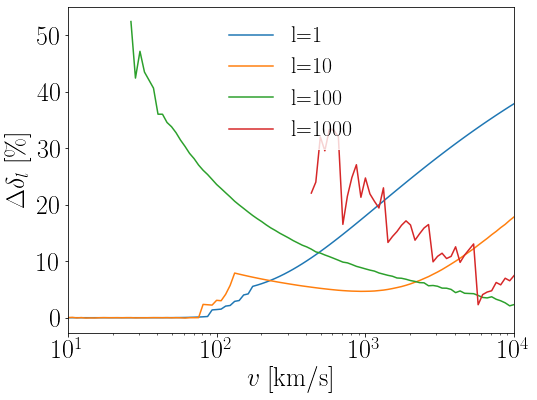

In [555]:
potential='attractive' #['attractive','repulsive']:
alphaX=10.**(-2.)
mX=200 #GeV
mphi=10**(-3.) #GeV.
#lvals=[1,5,10,50,100,1000]
lvals=[1,10,100,1000]

pl.figure(figsize=(8,6))
for i in range(0,len(lvals)):
    l=lvals[i]
    color='C'+str(i)
    vdelta_deltalvals=[]
    for j in range(0,len(vvals)):
        v=vvals[j]
        deltaapprval=deltalappr(potential,alphaX,mX,mphi,l,v)
        deltaval=deltal(potential,alphaX,mX,mphi,l,v)
        if not deltaval==0:
            delta_deltal=(deltaapprval-deltaval)/deltaapprval
            vdelta_deltalvals.append([v,delta_deltal])
    vdelta_deltalvals=np.array(vdelta_deltalvals)
    #pl.plot(vvals,[deltal(potential,alphaX,mX,mphi,l,v) for v in vvals],linestyle='-',label=str(l),color=color) 
    #pl.plot(vvals,[100.*((deltalappr(potential,alphaX,mX,mphi,l,v)-deltal(potential,alphaX,mX,mphi,l,v))/deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label='l='+str(l),color=color)
    #pl.plot(vvals,[(deltal(potential,alphaX,mX,mphi,l,v)-deltalappr(potential,alphaX,mX,mphi,l,v)) for v in vvals],linestyle='-',label=str(l),color=color)
    pl.plot(vdelta_deltalvals[:,0],100.*vdelta_deltalvals[:,1],linestyle='-',label='l='+str(l),color=color)


pl.xlim([vvals[0],vvals[-1]])
#pl.ylim([40.,90.])
pl.xscale('log')
#pl.yscale('log')    
pl.xlabel(r'$v\;{\rm [km/s]}$',fontsize=fontsize) 
pl.ylabel(r'$\Delta \delta_l\; [\%]$',fontsize=fontsize) 
pl.legend(loc='best',edgecolor='white',fontsize=legendfontsize) 
pl.savefig('Plots/difference_deltal.pdf',bbox_inches='tight')
print('Plots/difference_deltal.pdf exported.')
pl.show()